# Ситуация:
В компании доставки пиццы возникла проблема снижения скорости доставки к вечеру, связанная с пересменой курьеров. 

Новый алгоритм был предложен для оптимизации маршрутов курьеров, чтобы последние заказы доставлялись "по пути" домой.

## Цель эксперимента:
Оценить эффективность нового алгоритма с помощью A/B теста:

#### Контрольная группа: использует старый алгоритм.
#### Тестовая группа: использует новый алгоритм с функцией "по пути".

## Задача:
Проанализировать результаты эксперимента и принять решение о внедрении новой функции для всех курьеров.



# Описание данных
    •	order_id - id заказа
    •	delivery_time - время доставки в минутах
    •	district - район доставки
    •	experiment_group - экспериментальная группа

In [19]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(12,6)}, style="whitegrid")

from scipy.stats import ttest_ind

In [20]:
delivery = pd.read_csv('experiments.csv')

In [21]:
delivery

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control
...,...,...,...,...
20191,14561,42.0,Suburb,test
20192,12015,32.0,Suburb,test
20193,20077,23.0,Purlieus,test
20194,14861,41.0,Central,test


### Давайте рассмотрим группу курьеров со значением control в столбце experiment_group

In [22]:
delivery_control = delivery.query("experiment_group == 'control'")

In [23]:
delivery_control

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control
...,...,...,...,...
10087,2708,23.0,Central,control
10088,3918,45.0,Central,control
10089,9544,41.0,Suburb,control
10090,1101,38.0,Central,control


#### Поработаем с временем доставки заказа для группы control (столбец - delivery_time == control). 
#### Посмотрим на среднее значение и стандратное отклонение

In [24]:
# среднее значение
control_mean = delivery_control.delivery_time.mean()
control_mean

np.float64(45.065101070154576)

In [25]:
# стандартное отклонение
control_std = delivery_control.delivery_time.std()
control_std

np.float64(9.990016960246372)

### Давайте взглянем на распределение времени доставки заказов в группе control

<Axes: xlabel='delivery_time', ylabel='Count'>

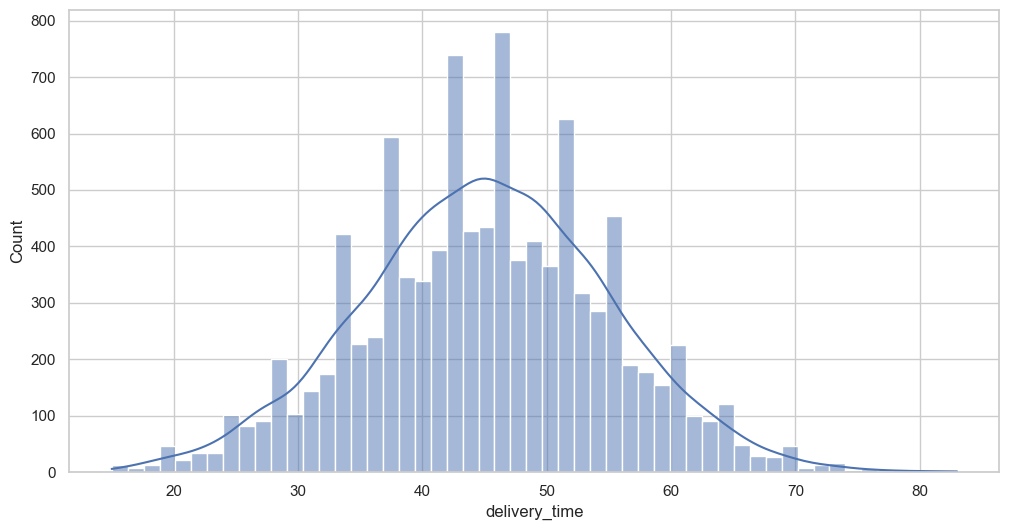

In [26]:
sns.histplot(delivery_control.delivery_time, kde=True)

### Выводы: 
        Да, на графике имеются выбросы, однако распределение - нормальное.

### Давайте рассмотрим группу курьеров со значением test в столбце experiment_group

In [27]:
delivery_test = delivery.query("experiment_group == 'test'")

In [28]:
delivery_test

,order_id,delivery_time,district,experiment_group
10092,12494,38.0,Purlieus,test
10093,12136,31.0,Purlieus,test
10094,11987,39.0,Purlieus,test
10095,12848,29.0,Central,test
10096,13166,31.0,Purlieus,test
...,...,...,...,...
20191,14561,42.0,Suburb,test
20192,12015,32.0,Suburb,test
20193,20077,23.0,Purlieus,test
20194,14861,41.0,Central,test


#### Поработаем с врмемнем доставки заказа для группы test (столбец - delivery_time == test). 
#### Посмотрим на среднее значение и стандратное отклонение

In [29]:
# среднее значение
test_mean = delivery_test.delivery_time.mean()
test_mean

np.float64(39.04681314330958)

In [30]:
# стандартное отклонение
test_std = delivery_test.delivery_time.std()
test_std

np.float64(9.883308351129061)

### Давайте взглянем на распределение времени доставки заказов в группе test

<Axes: xlabel='delivery_time', ylabel='Count'>

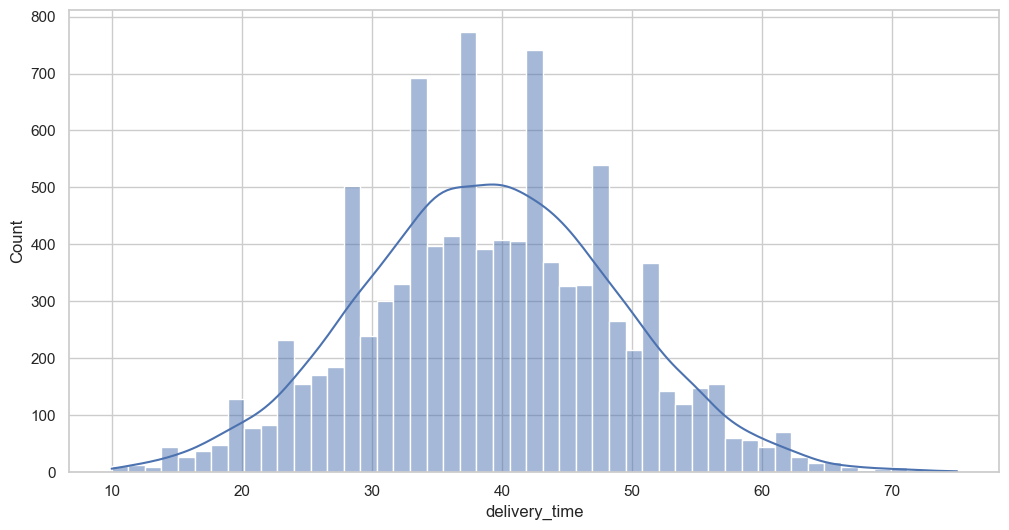

In [31]:
sns.histplot(delivery_test.delivery_time, kde=True)

### Выводы: 
        Да, на графике имеются выбросы, однако распределение так же является нормальным.

### Давайте наложим группы test и control друг на друга и посмотрим на различия

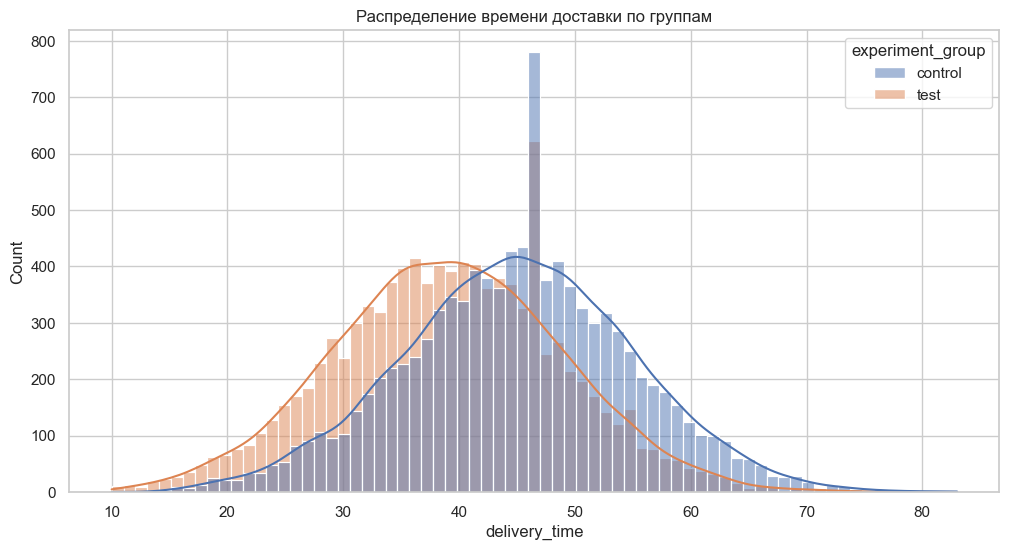

In [32]:
sns.histplot(data=delivery, x="delivery_time", hue="experiment_group", kde=True)
plt.title("Распределение времени доставки по группам")
plt.show()

## По графику распределения времени доставки видно, что:

Тестовая группа (оранжевый) в целом имеет смещение влево по сравнению с контрольной группой (синий).

Это говорит о том, что среднее время доставки в тестовой группе меньше, чем в контрольной группе.
    
    Медиана и распределение времени доставки: 
В тестовой группе пик распределения (максимальная плотность) находится на меньшем времени доставки, чем в контрольной группе. 

Это указывает на то, что курьеры в тестовой группе доставляют заказы быстрее.

## Выдвинем гипотезы.
        H0 (Нулевая гипотеза) - время доставки в группах control и test равны.

        H1 (Альтернативная гипотеза) - время доставки в группах control и test не равны.

### Какой тест выбираем ?

#### Так как данные распределены нормально, то будем использовать t-тест для независимых выборок

In [33]:
ttest_ind(delivery_control.delivery_time, delivery_test.delivery_time)

TtestResult(statistic=np.float64(43.03582663183714), pvalue=np.float64(0.0), df=np.float64(20194.0))

### _С p-значением равным нулю, мы можем с высокой уверенностью отвергнуть нулевую гипотезу о равенстве средних значений двух групп_

### Результаты t-теста (статистика и p-значение) говорят нам о том, что есть различия между группами, которые с высокой вероятностью не случайны
### Однако t-тест не говорит нам, в какую сторону отличаются средние — он просто указывает на само наличие различий

## Чтобы понять, является ли новое распределение (тестовая группа) улучшением, ухудшением или просто отличается от контрольного, важно сравнить средние значения

### __В нашем случае в тестовой группе среднее время доставки ниже, чем в контрольной.__
#### ___Это может свидетельствовать о сокращении времени доставки и об улучшении___

#### ___Как только мы установили, что различие статистически значимо, мы можем интерпретировать средние значения в каждой группе, чтобы понять направление и силу эффекта___